<a href="https://colab.research.google.com/github/handikamsf/data-wrangling/blob/main/Handling_Missing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Wrangling A: Handling Missing Data**

**Kelompok:** 7

---

**Nama (NPM):**

Saif Ali Zaky A. (24083010004)

M. Handika M. S. (24083010036)

Rizky Faza H. N. (24083010099)

Indra Maulana R. F. Y. (24083010105)

Yafi Rafsanjani H. (24083010122)


---


**Dosen Pengampu:**

Andri Fauzan Adziima, M.Si.

Kartika Maulida Hindrayani, S.Kom., M.Kom

# **Dataset Numerik**

In [ ]:
!kaggle datasets download -d akshaydattatraykhare/diabetes-dataset

Dataset URL: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset
License(s): CC0-1.0
diabetes-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip diabetes-dataset.zip

Archive:  diabetes-dataset.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
data = "diabetes.csv"
df = pd.read_csv(data, sep=',', encoding='latin-1')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


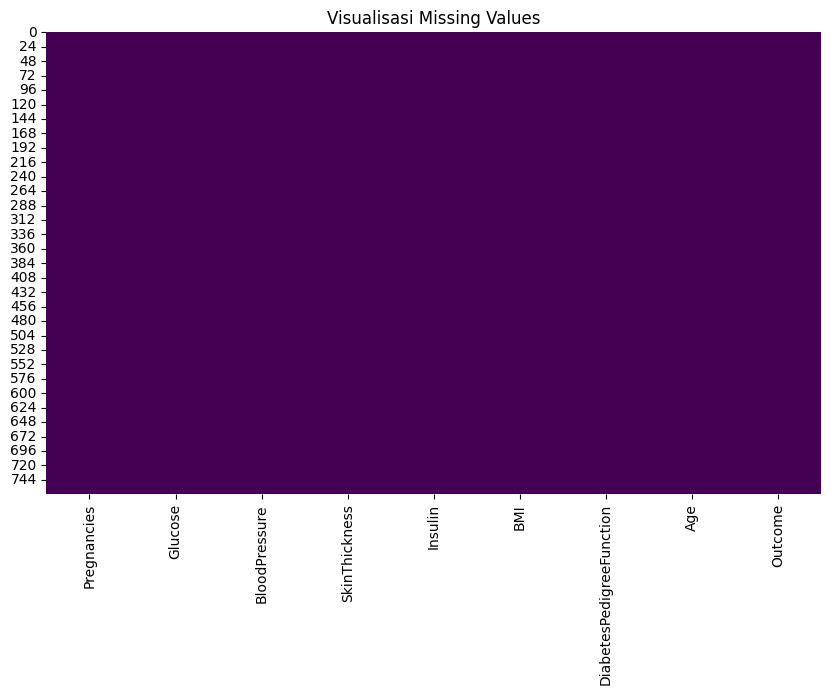

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

In [ ]:
df_with_missing = df.copy()
missing_percentage = 0.4
num_missing = int(missing_percentage * df_with_missing.size)
missing_indices = [
    (np.random.randint(0, df_with_missing.shape[0]), np.random.randint(0, df_with_missing.shape[1]))
    for _ in range(num_missing)
]

for row, col in missing_indices:
    df_with_missing.iat[row, col] = np.nan
print(df_with_missing.isnull().sum())

Pregnancies                 241
Glucose                     257
BloodPressure               258
SkinThickness               243
Insulin                     260
BMI                         263
DiabetesPedigreeFunction    234
Age                         260
Outcome                     268
dtype: int64


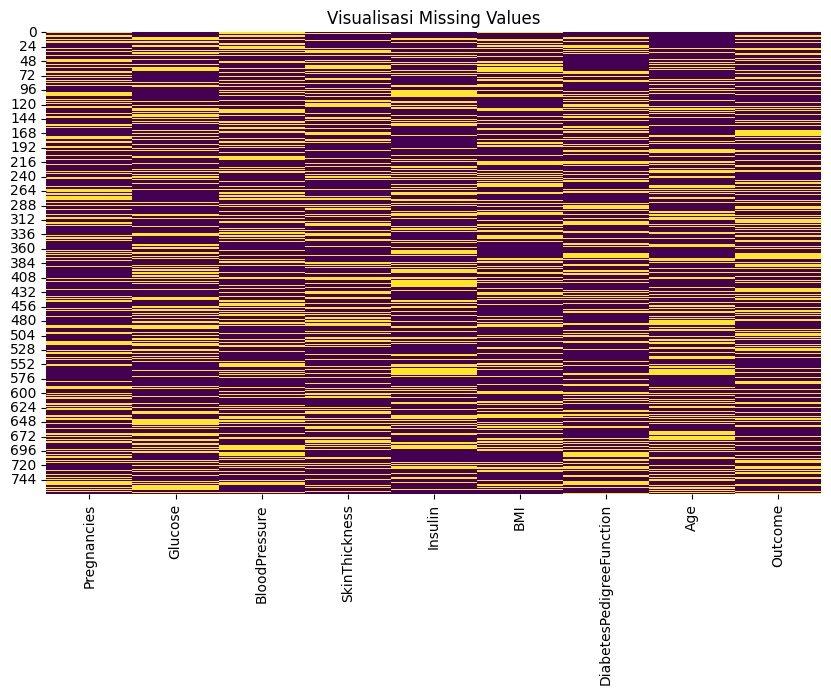

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_with_missing.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

In [ ]:
df_with_missing

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,148.0,NaN,35.0,0.0,33.6,0.627,50.0,1.0
1,NaN,85.0,NaN,29.0,NaN,26.6,NaN,31.0,NaN
2,8.0,183.0,NaN,0.0,0.0,23.3,0.672,32.0,NaN
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,NaN,0.0
4,0.0,NaN,40.0,35.0,NaN,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,NaN,101.0,76.0,48.0,180.0,NaN,NaN,63.0,0.0
764,2.0,122.0,70.0,NaN,0.0,36.8,0.340,27.0,NaN
765,5.0,121.0,72.0,23.0,NaN,26.2,0.245,30.0,NaN
766,1.0,NaN,60.0,0.0,0.0,NaN,0.349,47.0,1.0


## Menggunakan Mean

In [ ]:
df_mean = df_with_missing.fillna(df_with_missing.mean())
print("Missing values setelah Mean Imputation:\n", df_mean.isnull().sum())
df_mean

Missing values setelah Mean Imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3.841085,148.000000,68.585366,35.000000,0.000000,33.60000,0.62700,50.000000,1.000000
1,3.841085,85.000000,68.585366,29.000000,80.072266,26.60000,0.47121,31.000000,0.338552
2,8.000000,183.000000,68.585366,0.000000,0.000000,23.30000,0.67200,32.000000,0.338552
3,1.000000,89.000000,66.000000,23.000000,94.000000,28.10000,0.16700,33.747646,0.000000
4,0.000000,120.431559,40.000000,35.000000,80.072266,43.10000,2.28800,33.000000,1.000000
...,...,...,...,...,...,...,...,...,...
763,3.841085,101.000000,76.000000,48.000000,180.000000,32.50153,0.47121,63.000000,0.000000
764,2.000000,122.000000,70.000000,20.307087,0.000000,36.80000,0.34000,27.000000,0.338552
765,5.000000,121.000000,72.000000,23.000000,80.072266,26.20000,0.24500,30.000000,0.338552
766,1.000000,120.431559,60.000000,0.000000,0.000000,32.50153,0.34900,47.000000,1.000000


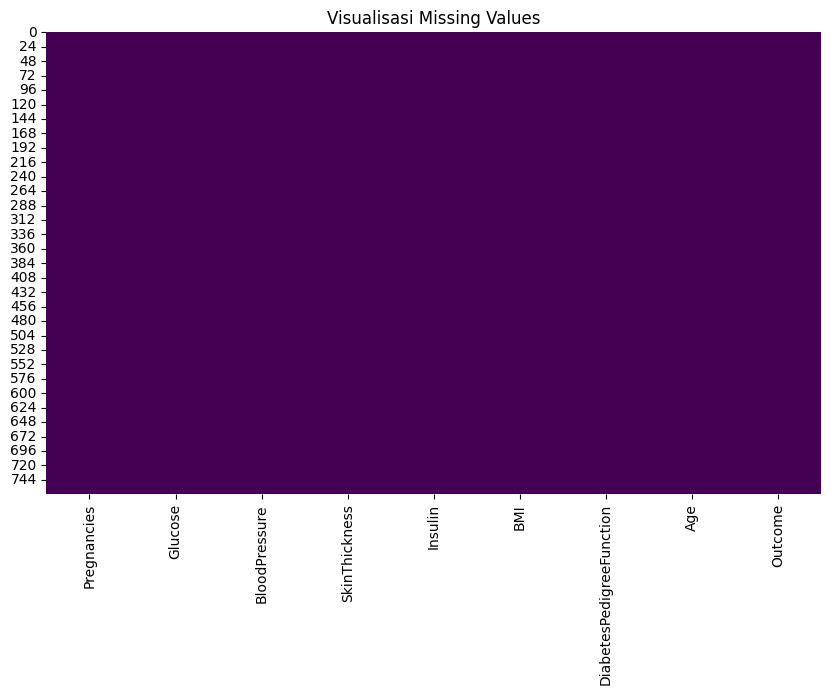

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_mean.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

## Menggunakan Median

In [ ]:
df_with_missing = df.copy()
missing_percentage = 0.4
num_missing = int(missing_percentage * df_with_missing.size)
missing_indices = [
    (np.random.randint(0, df_with_missing.shape[0]), np.random.randint(0, df_with_missing.shape[1]))
    for _ in range(num_missing)
]

for row, col in missing_indices:
    df_with_missing.iat[row, col] = np.nan
print(df_with_missing.isnull().sum())

Pregnancies                 252
Glucose                     242
BloodPressure               276
SkinThickness               260
Insulin                     256
BMI                         245
DiabetesPedigreeFunction    254
Age                         237
Outcome                     257
dtype: int64


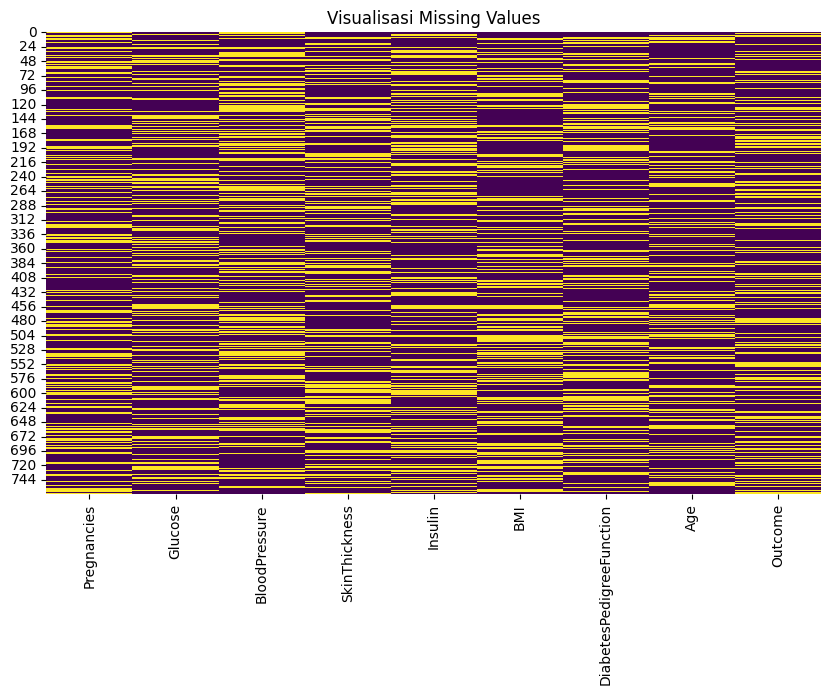

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_with_missing.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

In [ ]:
df_median = df_with_missing.fillna(df_with_missing.median())
print("Missing values setelah Median Imputation:\n", df_median.isnull().sum())
df_median

Missing values setelah Median Imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3.0,148.0,70.0,35.0,0.0,33.6,0.627,50.0,1.0
1,3.0,85.0,70.0,29.0,22.5,26.6,0.367,31.0,0.0
2,8.0,183.0,70.0,0.0,0.0,23.3,0.672,32.0,0.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,30.0,0.0
4,0.0,117.0,40.0,35.0,22.5,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,3.0,101.0,76.0,48.0,180.0,32.4,0.367,63.0,0.0
764,2.0,122.0,70.0,22.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,22.5,26.2,0.245,30.0,0.0
766,1.0,117.0,60.0,0.0,0.0,32.4,0.349,47.0,1.0


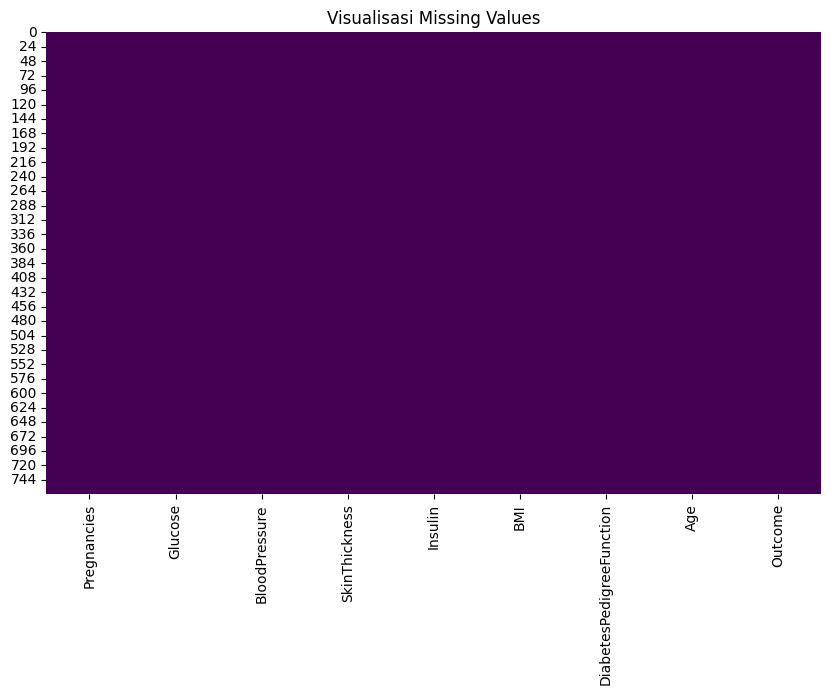

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_median.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

## Menggunakan Mode

In [ ]:
df_with_missing = df.copy()
missing_percentage = 0.4
num_missing = int(missing_percentage * df_with_missing.size)
missing_indices = [
    (np.random.randint(0, df_with_missing.shape[0]), np.random.randint(0, df_with_missing.shape[1]))
    for _ in range(num_missing)
]

for row, col in missing_indices:
    df_with_missing.iat[row, col] = np.nan
print(df_with_missing.isnull().sum())

Pregnancies                 227
Glucose                     243
BloodPressure               259
SkinThickness               241
Insulin                     255
BMI                         257
DiabetesPedigreeFunction    273
Age                         271
Outcome                     240
dtype: int64


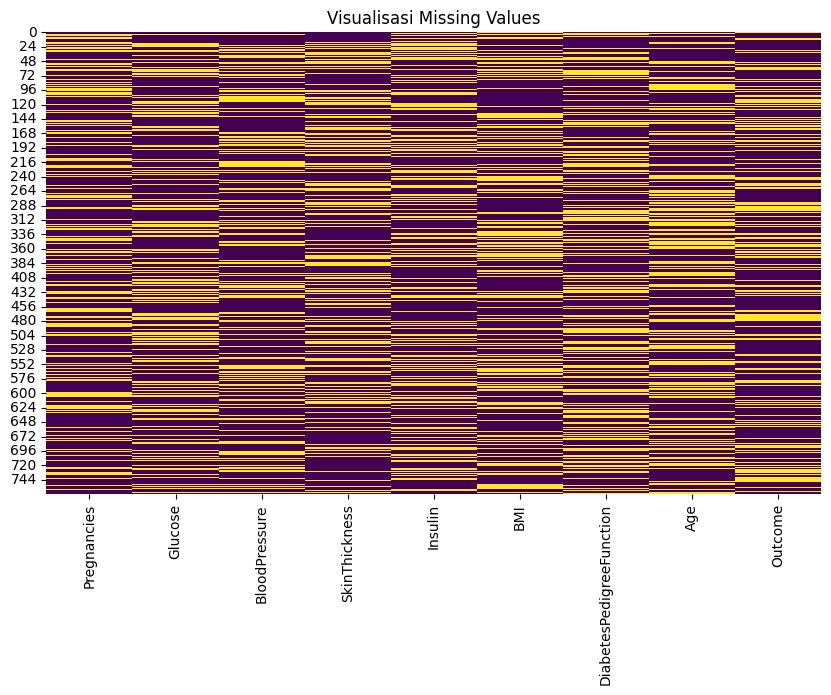

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_with_missing.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

In [ ]:
df_mode = df_with_missing.fillna(df_with_missing.mode().iloc[0])
print("Missing values setelah Mode Imputation:\n", df_mode.isnull().sum())
df_mode

Missing values setelah Mode Imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.0,148.0,70.0,35.0,0.0,33.6,0.627,50.0,1.0
1,0.0,85.0,70.0,29.0,0.0,26.6,0.207,31.0,0.0
2,8.0,183.0,70.0,0.0,0.0,23.3,0.672,32.0,0.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,22.0,0.0
4,0.0,100.0,40.0,35.0,0.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,0.0,101.0,76.0,48.0,180.0,31.2,0.207,63.0,0.0
764,2.0,122.0,70.0,0.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,0.0,26.2,0.245,30.0,0.0
766,1.0,100.0,60.0,0.0,0.0,31.2,0.349,47.0,1.0


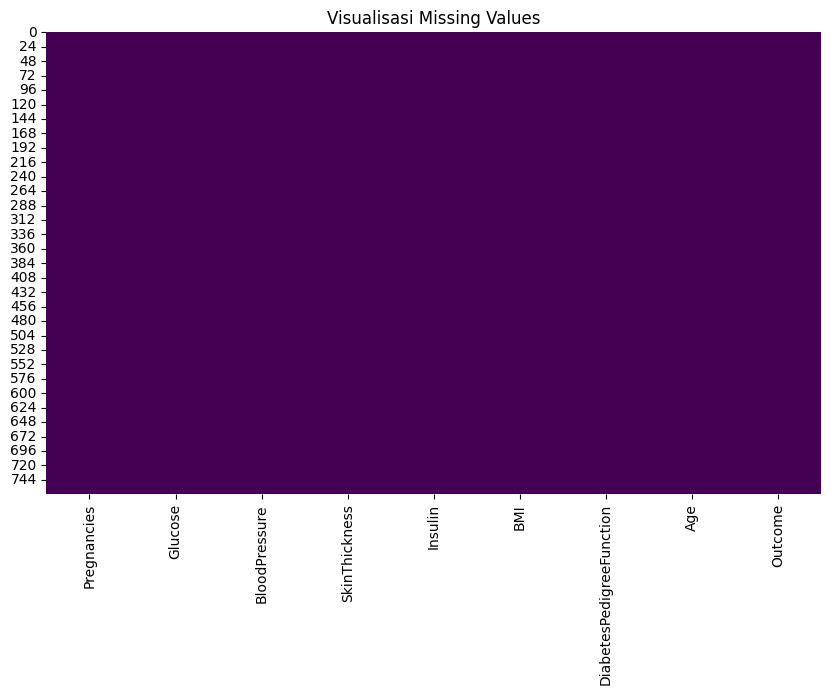

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_mode.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

## Menggunakan Interpolasi

In [ ]:
df_with_missing = df.copy()
missing_percentage = 0.1
num_missing = int(missing_percentage * df_with_missing.size)
missing_indices = [
    (np.random.randint(0, df_with_missing.shape[0]), np.random.randint(0, df_with_missing.shape[1]))
    for _ in range(num_missing)
]

for row, col in missing_indices:
    df_with_missing.iat[row, col] = np.nan
print(df_with_missing.isnull().sum())

Pregnancies                 71
Glucose                     74
BloodPressure               63
SkinThickness               75
Insulin                     81
BMI                         81
DiabetesPedigreeFunction    67
Age                         71
Outcome                     73
dtype: int64


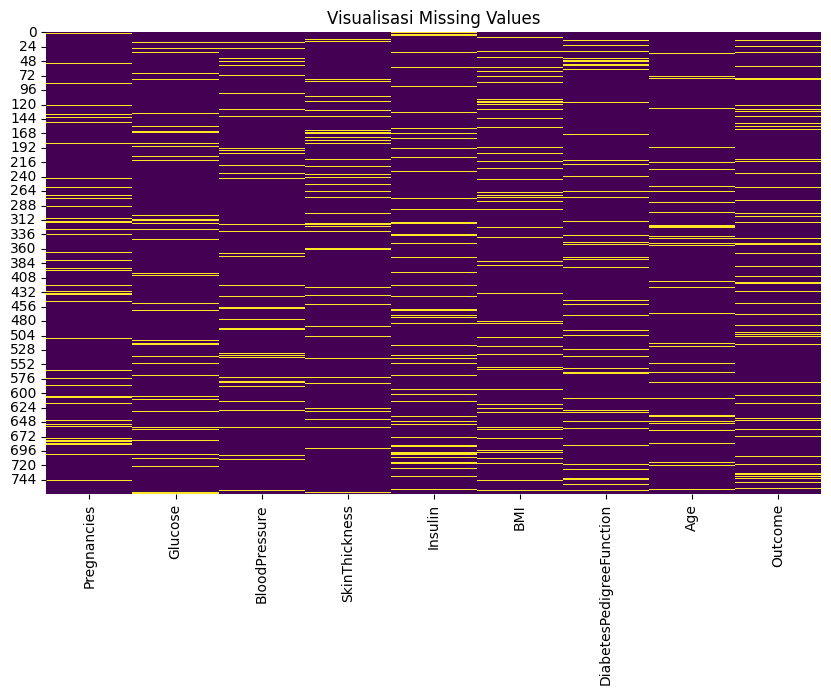

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_with_missing.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

In [ ]:
df_interpolate = df_with_missing.interpolate()
print("Missing values setelah Interpolasi:\n", df_interpolate.isnull().sum())
df_interpolate

Missing values setelah Interpolasi:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     1
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,1.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,92.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,124.0,72.0,13.5,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.280,26.5,1.0


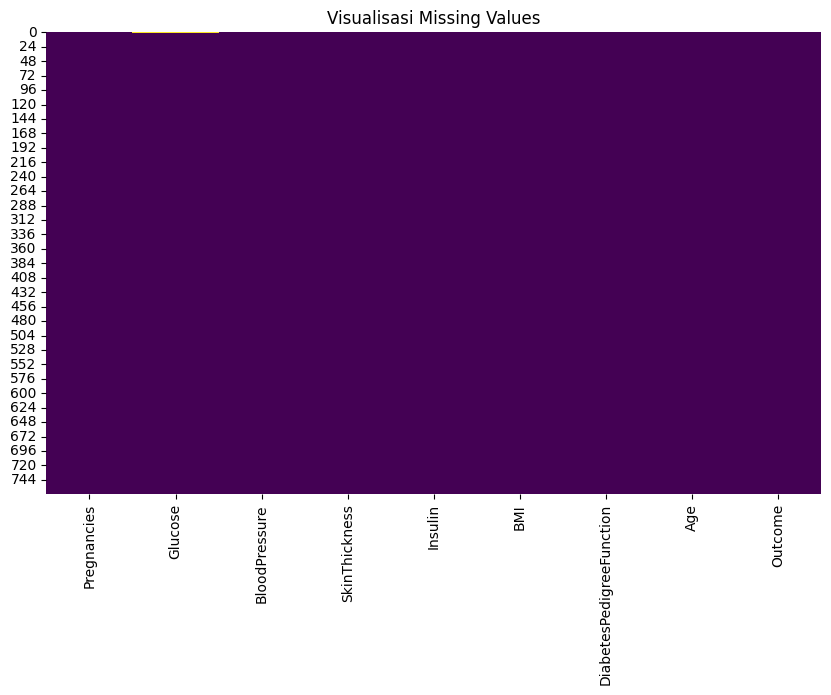

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_interpolate.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

## KNN Imputation

In [ ]:
df_with_missing = df.copy()
missing_percentage = 0.4
num_missing = int(missing_percentage * df_with_missing.size)
missing_indices = [
    (np.random.randint(0, df_with_missing.shape[0]), np.random.randint(0, df_with_missing.shape[1]))
    for _ in range(num_missing)
]

for row, col in missing_indices:
    df_with_missing.iat[row, col] = np.nan
print(df_with_missing.isnull().sum())

Pregnancies                 235
Glucose                     254
BloodPressure               228
SkinThickness               264
Insulin                     275
BMI                         250
DiabetesPedigreeFunction    280
Age                         237
Outcome                     241
dtype: int64


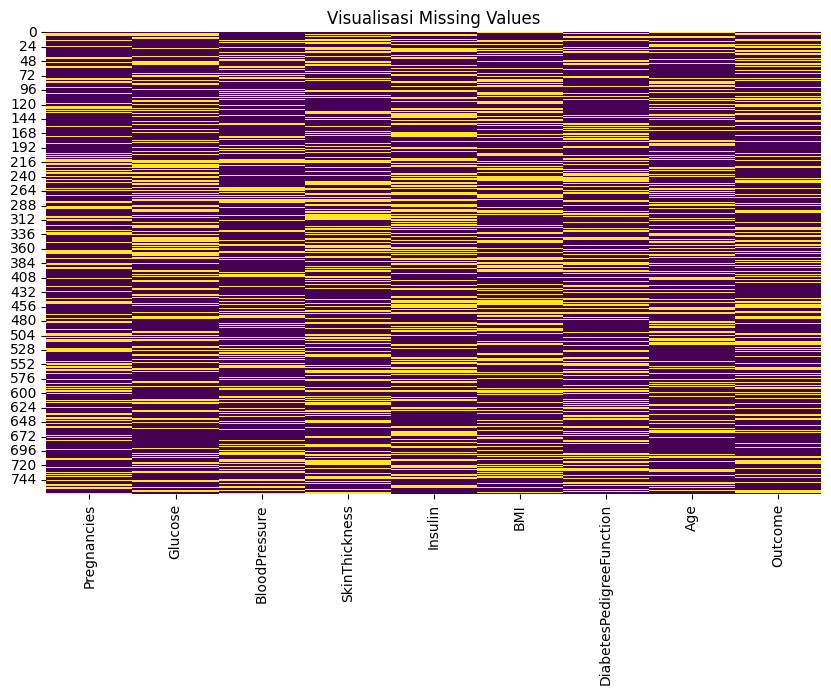

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_with_missing.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)
df_knn = pd.DataFrame(knn_imputer.fit_transform(df_with_missing), columns=df_with_missing.columns)
print("Missing values setelah KNN Imputation:\n", df_knn.isnull().sum())
df_knn

Missing values setelah KNN Imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,4.2,148.0,86.0,35.0,0.0,33.60,0.6270,50.0,1.0
1,4.8,85.0,64.8,29.0,32.6,26.60,0.5326,31.0,0.0
2,8.0,183.0,71.2,0.0,0.0,23.30,0.6720,32.0,0.2
3,1.0,89.0,66.0,23.0,94.0,28.10,0.1670,27.0,0.0
4,0.0,101.2,40.0,35.0,102.2,43.10,2.2880,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,5.8,101.0,76.0,48.0,180.0,35.42,0.6808,63.0,0.0
764,2.0,122.0,70.0,22.6,0.0,36.80,0.3400,27.0,0.2
765,5.0,121.0,72.0,23.0,67.6,26.20,0.2450,30.0,0.2
766,1.0,111.8,60.0,0.0,0.0,37.14,0.3490,47.0,1.0


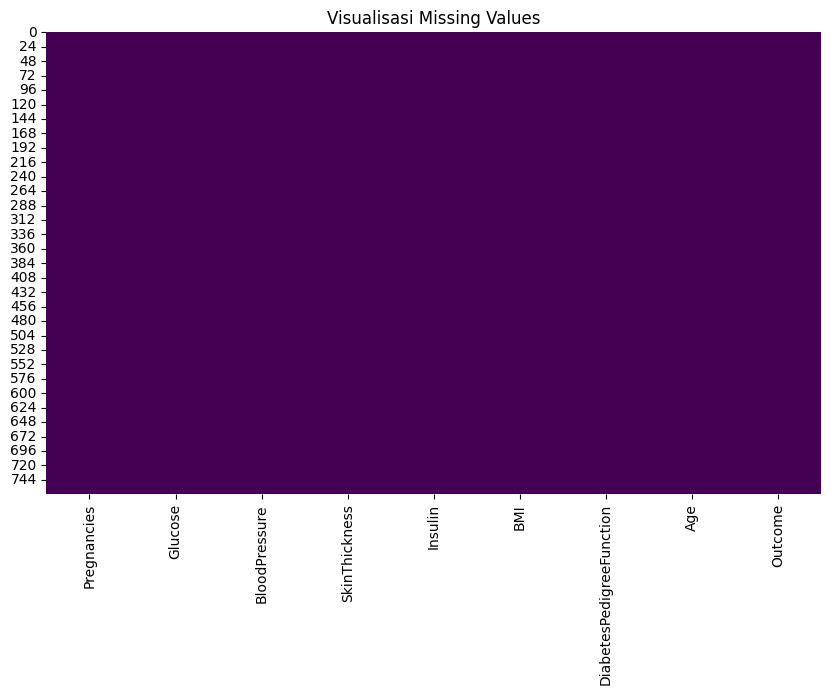

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_knn.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

## EM Algorithm

In [ ]:
df_with_missing = df.copy()
missing_percentage = 0.4
num_missing = int(missing_percentage * df_with_missing.size)
missing_indices = [
    (np.random.randint(0, df_with_missing.shape[0]), np.random.randint(0, df_with_missing.shape[1]))
    for _ in range(num_missing)
]

for row, col in missing_indices:
    df_with_missing.iat[row, col] = np.nan
print(df_with_missing.isnull().sum())

Pregnancies                 280
Glucose                     256
BloodPressure               259
SkinThickness               257
Insulin                     244
BMI                         264
DiabetesPedigreeFunction    250
Age                         259
Outcome                     231
dtype: int64


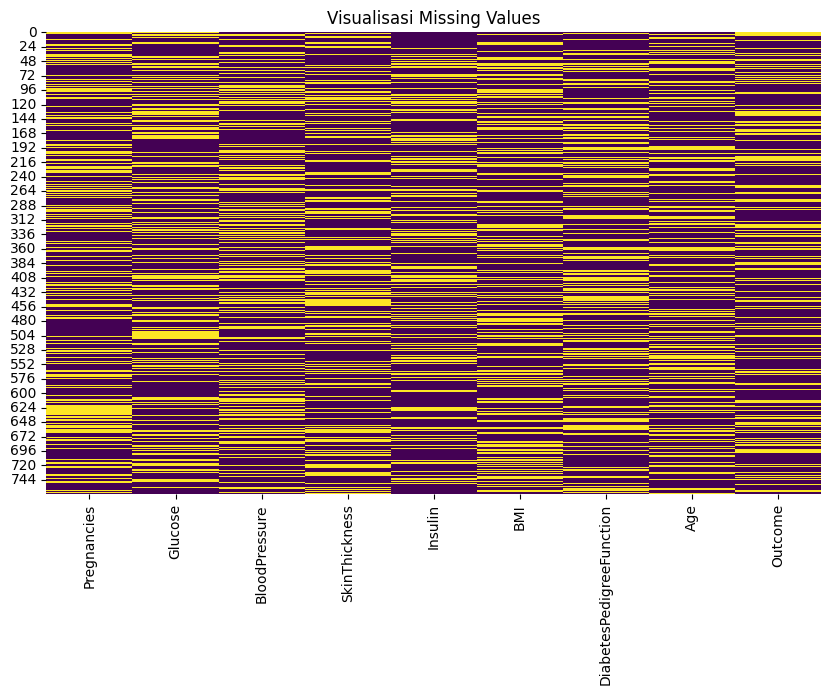

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_with_missing.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

In [ ]:
em_imputer = IterativeImputer()
df_em = pd.DataFrame(em_imputer.fit_transform(df_with_missing), columns=df_with_missing.columns)
print("Missing values setelah EM Algorithm:\n", df_em.isnull().sum())
df_em

Missing values setelah EM Algorithm:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3.402467,148.000000,62.472756,35.000000,0.000000,33.600000,0.627000,50.000000,1.000000
1,3.229423,85.000000,64.862760,29.000000,106.174829,26.600000,0.445604,31.000000,0.003007
2,8.000000,183.000000,-13.565726,0.000000,0.000000,23.300000,0.672000,32.000000,1.227796
3,1.000000,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,23.240166,0.000000
4,0.000000,200.810797,40.000000,35.000000,84.640844,43.100000,2.288000,33.000000,1.000000
...,...,...,...,...,...,...,...,...,...
763,10.516006,101.000000,76.000000,48.000000,180.000000,26.563335,0.534546,63.000000,0.000000
764,2.000000,122.000000,70.000000,14.721220,0.000000,36.800000,0.340000,27.000000,0.376317
765,5.000000,121.000000,72.000000,23.000000,238.718893,26.200000,0.245000,30.000000,0.257097
766,1.000000,182.187932,60.000000,0.000000,0.000000,24.107230,0.349000,47.000000,1.000000


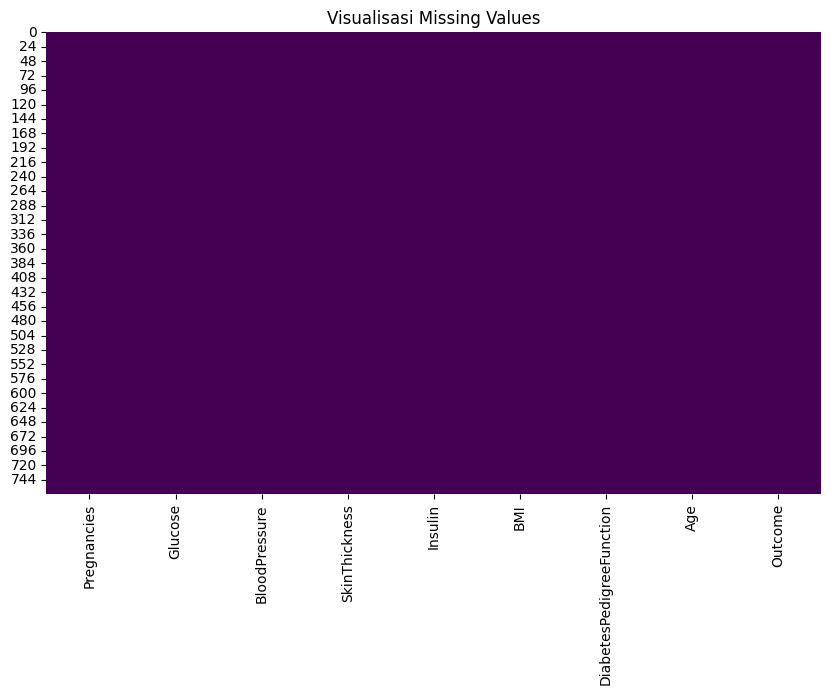

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_em.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

# **Dataset Kategorikal**

In [ ]:
  !kaggle datasets download -d uciml/adult-census-income

Dataset URL: https://www.kaggle.com/datasets/uciml/adult-census-income
License(s): CC0-1.0
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 44.7MB/s]


In [ ]:
!unzip  adult-census-income.zip

Archive:  adult-census-income.zip
  inflating: adult.csv               


In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
data = "adult.csv"
df = pd.read_csv(data, sep=',', encoding='latin-1')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


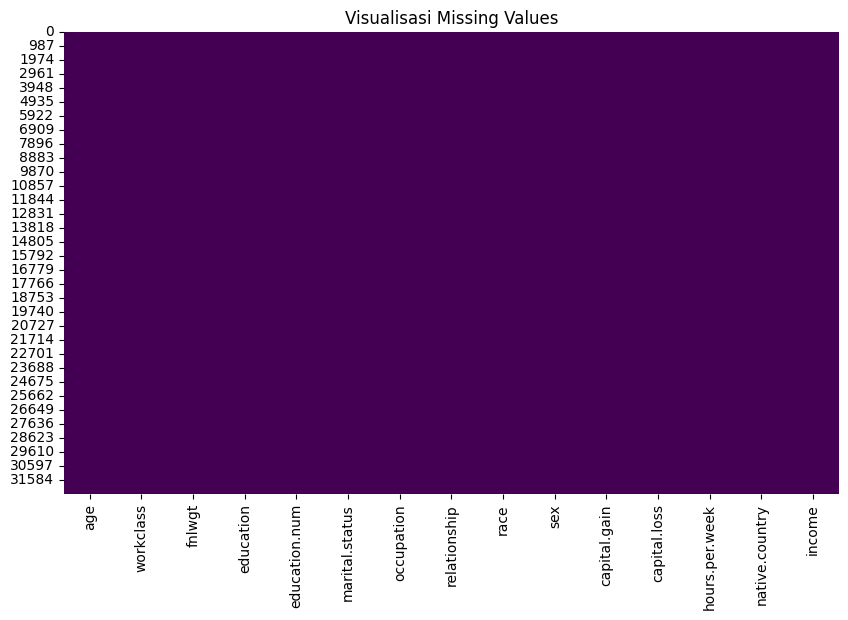

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

In [ ]:
missing_percentage = 0.3
categorical_columns = ["workclass", "occupation", "native.country"]

# Menambahkan nilai NaN secara acak
df = df.copy()
for col in categorical_columns:
    df.loc[df.sample(frac=missing_percentage).index, col] = np.nan

# Mengubah tanda tanya "?" menjadi NaN di seluruh dataset
df.replace("?", np.nan, inplace=True)

# Menampilkan jumlah missing values
print(df.isnull().sum())

# Menyimpan ke file baru
df.to_csv("modified_dataset.csv", index=False)

df_MNG = df.copy() # Menyalin dataframe
df_MNG

age                   0
workclass         11031
fnlwgt                0
education             0
education.num         0
marital.status        0
occupation        11048
relationship          0
race                  0
sex                   0
capital.gain          0
capital.loss          0
hours.per.week        0
native.country    10184
income                0
dtype: int64


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,NaN,<=50K
1,82,NaN,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,NaN,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,NaN,257302,Assoc-acdm,12,Married-civ-spouse,NaN,Wife,White,Female,0,0,38,NaN,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,NaN,Unmarried,White,Female,0,0,40,NaN,<=50K


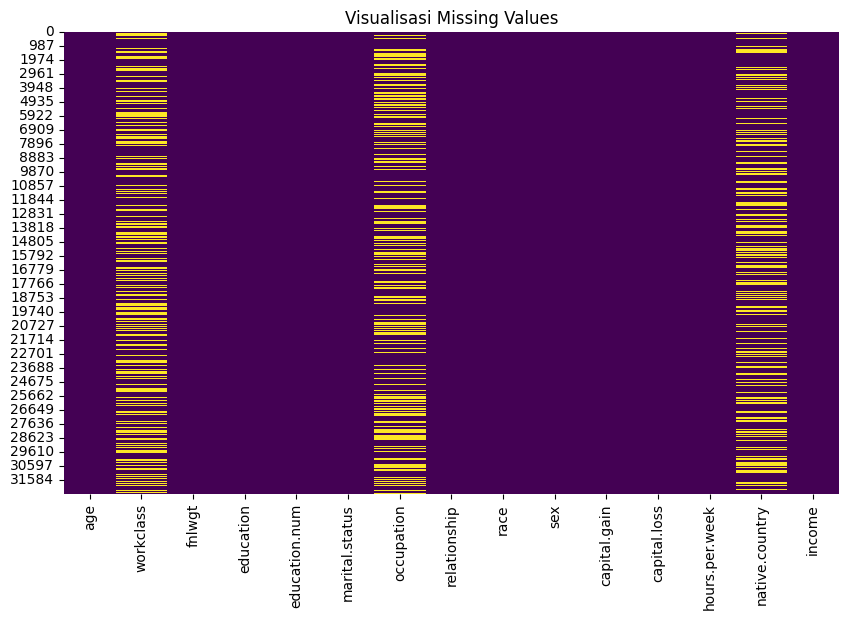

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

# Mode Imputation: Mengganti nilai yang hilang dengan kategori yang paling sering


In [ ]:
df_Ak1 = df_MNG.copy()
df_Ak1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,NaN,<=50K
1,82,NaN,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,NaN,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,NaN,257302,Assoc-acdm,12,Married-civ-spouse,NaN,Wife,White,Female,0,0,38,NaN,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,NaN,Unmarried,White,Female,0,0,40,NaN,<=50K


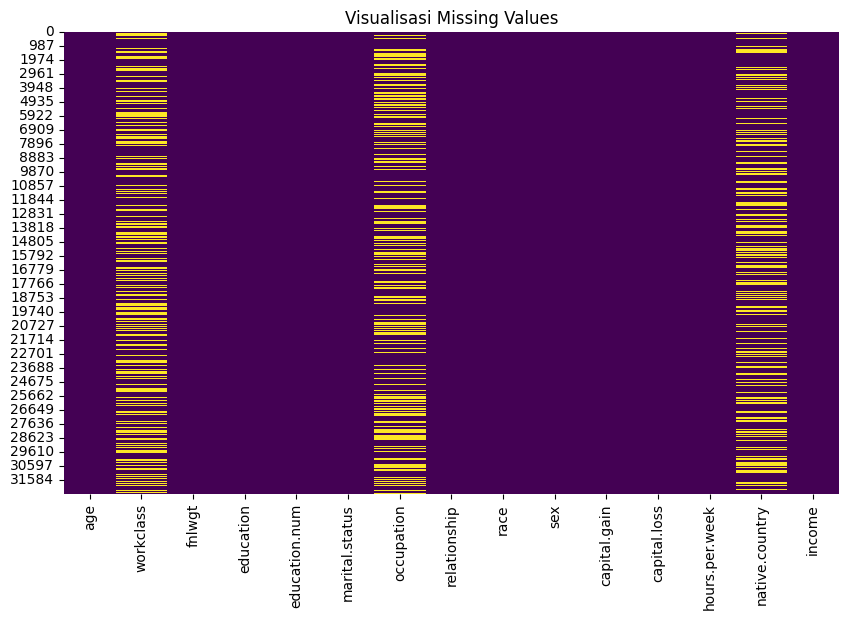

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_Ak1.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()


In [ ]:
# Mode Imputation - Mengganti nilai yang hilang dengan kategori yang paling sering muncul
for col in categorical_columns:
    df_Ak1[col].fillna(df[col].mode()[0], inplace=True)

# Cek apakah masih ada missing values setelah imputasi
print(df_Ak1.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


<ipython-input-12-a9cef15447a9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Ak1[col].fillna(df[col].mode()[0], inplace=True)


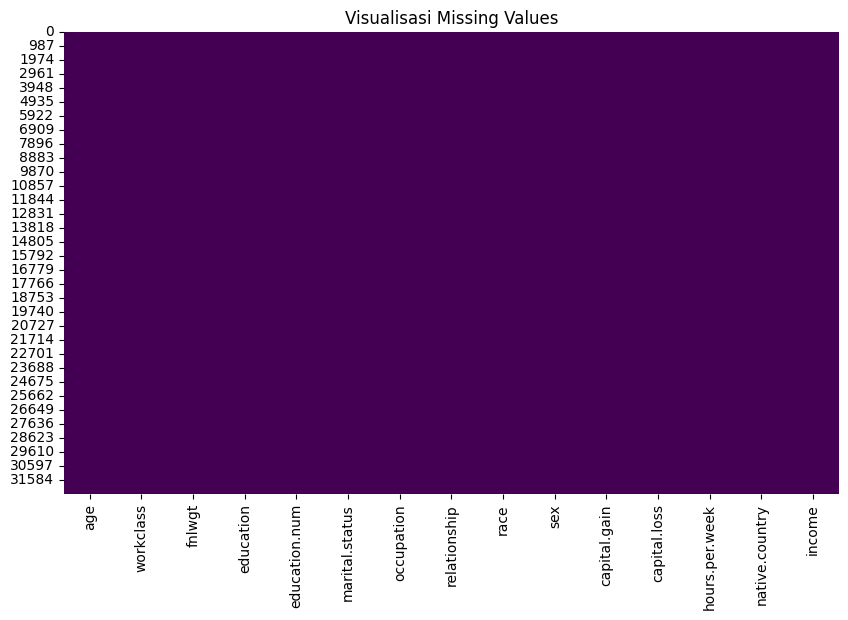

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_Ak1.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()


# Frequent Category Imputation: Menggunakan kategori yang paling sering muncul dalam seluruh dataset.

In [ ]:
df_Ak2 = df_MNG.copy()
df_Ak2

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,NaN,<=50K
1,82,NaN,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,NaN,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,NaN,257302,Assoc-acdm,12,Married-civ-spouse,NaN,Wife,White,Female,0,0,38,NaN,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,NaN,Unmarried,White,Female,0,0,40,NaN,<=50K


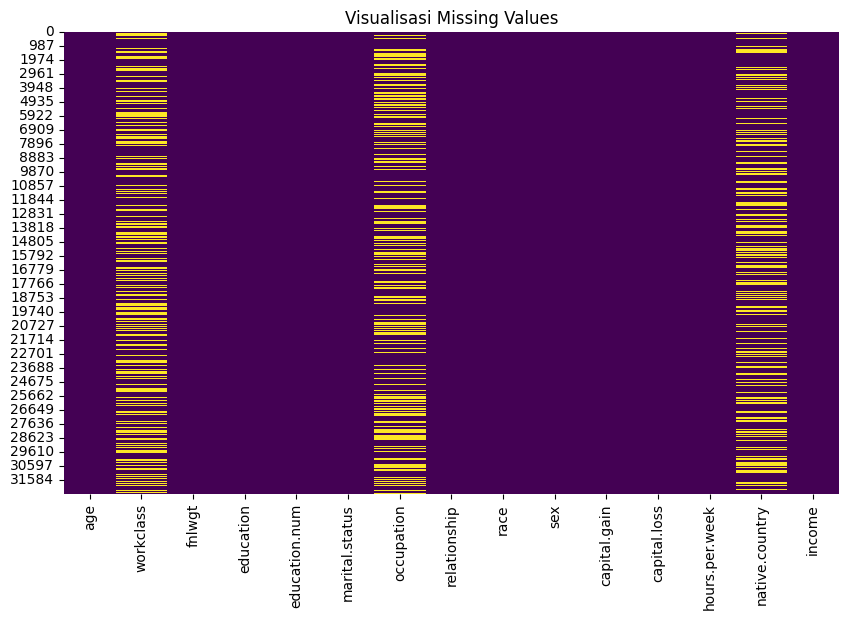

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_Ak2.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()


In [ ]:
# Imputasi Frequent Category
for col in ['workclass', 'occupation', 'native.country']:  # Kolom yang memiliki missing values
    most_frequent = df_Ak2[col].mode()[0]  # Cari nilai modus (yang paling sering muncul)
    df_Ak2[col].fillna(most_frequent, inplace=True)  # Isi missing values dengan nilai modus

# Cek apakah masih ada missing values setelah imputasi
print(df_Ak2.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


<ipython-input-17-dc7fe396a306>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Ak2[col].fillna(most_frequent, inplace=True)  # Isi missing values dengan nilai modus


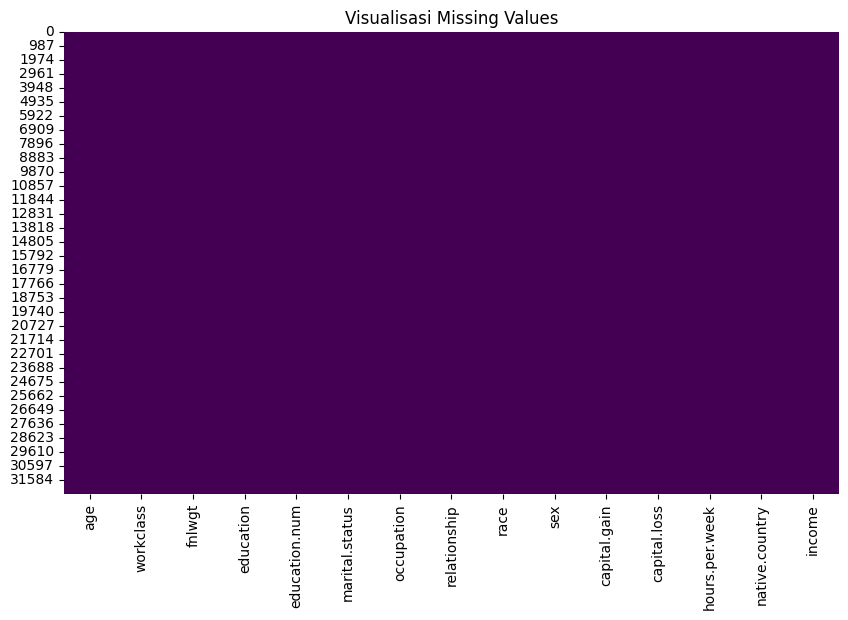

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_Ak2.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()


# Random Imputation: Mengisi nilai yang hilang dengan kategori yang dipilih secara acak dari kategori yang ada.

In [ ]:
df_Ak3 = df_MNG.copy()
df_Ak3

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,NaN,<=50K
1,82,NaN,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,NaN,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,NaN,257302,Assoc-acdm,12,Married-civ-spouse,NaN,Wife,White,Female,0,0,38,NaN,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,NaN,Unmarried,White,Female,0,0,40,NaN,<=50K


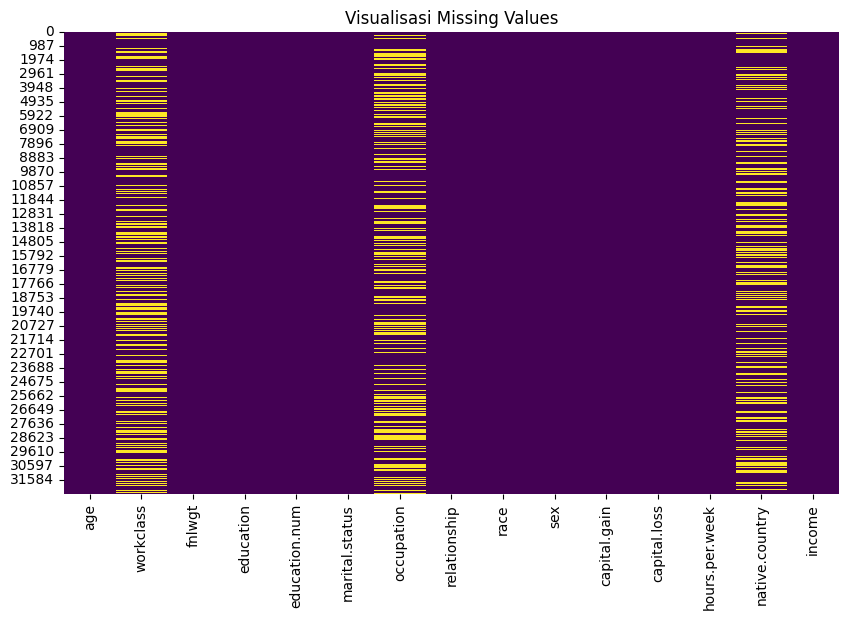

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_Ak3.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()


In [ ]:

# Copy dataset untuk memastikan df_Ak3 tidak merusak dataset asli
df_Ak3 = df_Ak2.copy()

# Tentukan kolom kategorikal yang ingin di-impute
categorical_columns = ['workclass', 'occupation', 'native.country']  # Sesuaikan dengan datasetmu

# Fungsi untuk Random Imputation
def random_imputation(df, column):
    """Mengisi nilai NaN dengan sampel acak dari nilai yang tersedia dalam kolom."""
    missing_idx = df[column].isnull()  # Indeks nilai yang hilang
    non_missing_values = df[column].dropna().values  # Ambil nilai yang tidak kosong

    # Isi nilai NaN dengan nilai acak dari kategori yang ada
    df.loc[missing_idx, column] = np.random.choice(non_missing_values, size=missing_idx.sum(), replace=True)

# Terapkan imputasi pada setiap kolom kategorikal yang dipilih
for col in categorical_columns:
    random_imputation(df_Ak3, col)

# Cek hasil imputasi
print("Jumlah missing values setelah imputasi:\n", df_Ak3[categorical_columns].isnull().sum())


Jumlah missing values setelah imputasi:
 workclass         0
occupation        0
native.country    0
dtype: int64


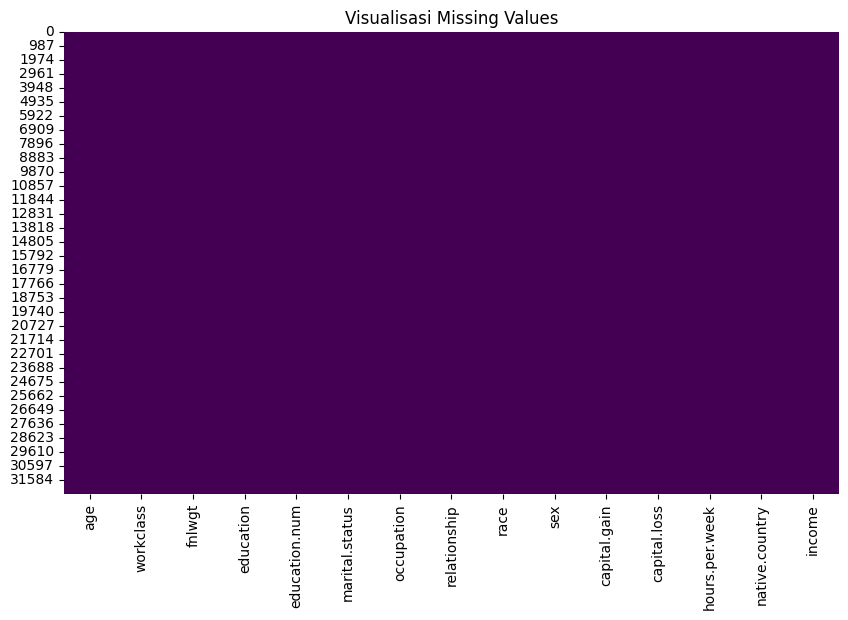

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_Ak3.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()


# KNN Imputation: Menggunakan algoritma KNN untuk mengisi missing values berdasarkan kemiripan data.

In [ ]:
df_Ak4 = df_MNG.copy()
df_Ak4

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,NaN,<=50K
1,82,NaN,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,NaN,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,NaN,257302,Assoc-acdm,12,Married-civ-spouse,NaN,Wife,White,Female,0,0,38,NaN,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,NaN,Unmarried,White,Female,0,0,40,NaN,<=50K


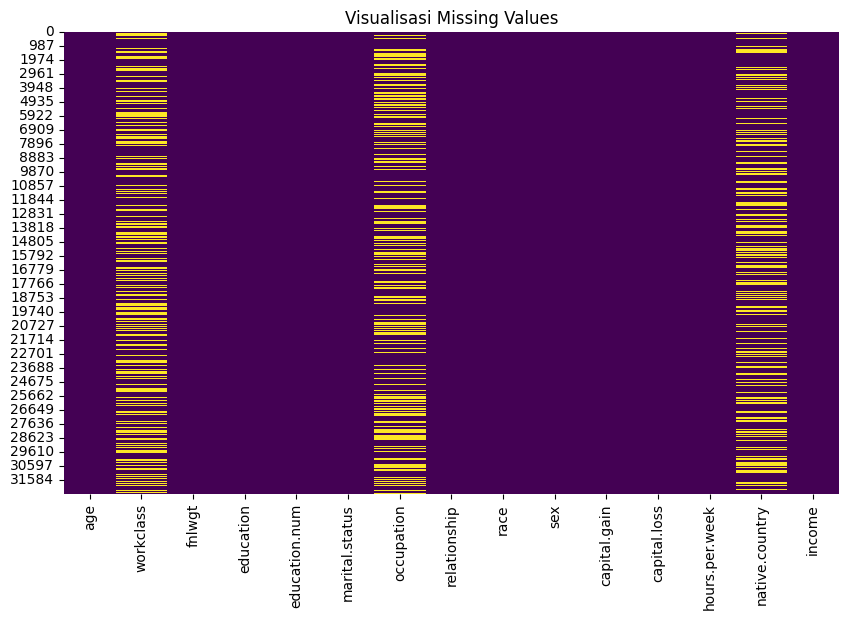

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_Ak4.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Copy dataset agar df_Ak4 tidak mengubah df_Ak2 secara langsung
df_Ak4 = df_Ak2.copy()

# Menentukan kolom kategorikal
categorical_columns = ['workclass', 'education', 'marital.status', 'occupation',
                        'relationship', 'race', 'sex', 'native.country', 'income']

# Menggunakan Label Encoding untuk kolom kategorikal
label_encoders = {}  # Simpan encoder agar bisa dikembalikan ke bentuk kategori nanti
for col in categorical_columns:
    le = LabelEncoder()
    df_Ak4[col] = le.fit_transform(df_Ak4[col].astype(str))  # Konversi ke string sebelum encoding
    label_encoders[col] = le  # Simpan encoder untuk digunakan nanti

# Inisialisasi KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Mengimputasi dataset
df_Ak4_imputed = pd.DataFrame(knn_imputer.fit_transform(df_Ak4), columns=df_Ak4.columns)

# Mengembalikan nilai kategorikal ke bentuk aslinya setelah imputasi
for col in categorical_columns:
    df_Ak4_imputed[col] = df_Ak4_imputed[col].round().astype(int)  # Bulatkan hasil imputasi
    df_Ak4_imputed[col] = label_encoders[col].inverse_transform(df_Ak4_imputed[col])  # Kembalikan ke bentuk kategori asli

# Cek apakah masih ada missing values
print("Jumlah missing values setelah KNN Imputation:\n", df_Ak4_imputed.isnull().sum())


Jumlah missing values setelah KNN Imputation:
 age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


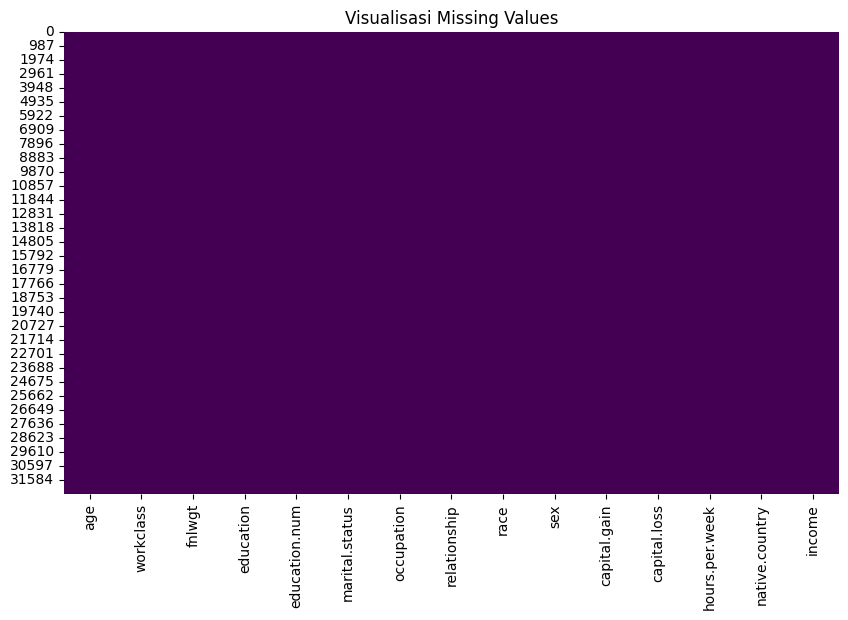

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_Ak4.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()


# Indicator Variable: Approach Menambahkan variabel indikator (misalnya is_missing) untuk menandai apakah nilai hilang.

In [ ]:
df_Ak5 = df_MNG.copy()
df_Ak5

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,NaN,<=50K
1,82,NaN,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,NaN,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,NaN,257302,Assoc-acdm,12,Married-civ-spouse,NaN,Wife,White,Female,0,0,38,NaN,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,NaN,Unmarried,White,Female,0,0,40,NaN,<=50K


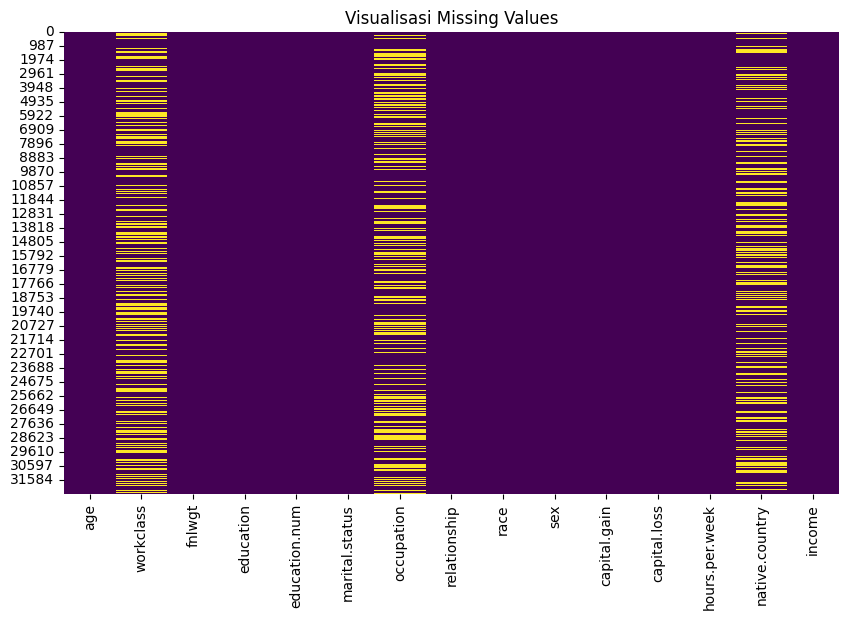

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_Ak5.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()


In [ ]:
# Copy dataset agar df_Ak5 tidak mengubah df_Ak2 secara langsung
df_Ak5 = df_Ak2.copy()

# Menambahkan kolom indikator untuk setiap kolom yang memiliki missing values
for col in df_Ak5.columns:
    df_Ak5[col + '_is_missing'] = df_Ak5[col].isnull().astype(int)

# Cek hasilnya
print("Jumlah missing values per kolom:\n", df_Ak5.isnull().sum())



Jumlah missing values per kolom:
 age                          0
workclass                    0
fnlwgt                       0
education                    0
education.num                0
marital.status               0
occupation                   0
relationship                 0
race                         0
sex                          0
capital.gain                 0
capital.loss                 0
hours.per.week               0
native.country               0
income                       0
age_is_missing               0
workclass_is_missing         0
fnlwgt_is_missing            0
education_is_missing         0
education.num_is_missing     0
marital.status_is_missing    0
occupation_is_missing        0
relationship_is_missing      0
race_is_missing              0
sex_is_missing               0
capital.gain_is_missing      0
capital.loss_is_missing      0
hours.per.week_is_missing    0
native.country_is_missing    0
income_is_missing            0
dtype: int64


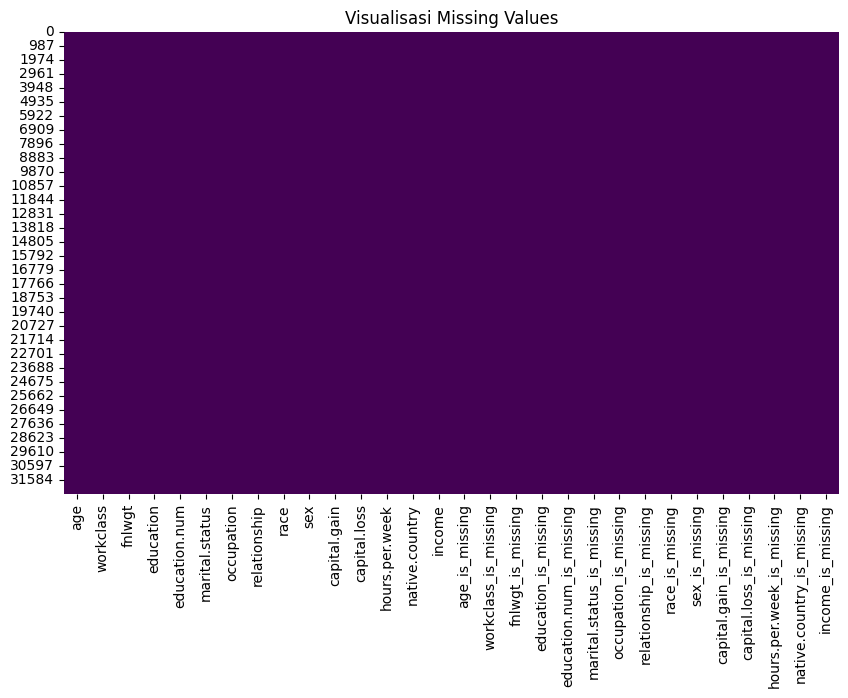

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_Ak5.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()


# **Dataset Time Series**

In [ ]:
!kaggle datasets download -d gauravsahani/timeseries-analysis-for-whether-dataset

Dataset URL: https://www.kaggle.com/datasets/gauravsahani/timeseries-analysis-for-whether-dataset
License(s): unknown
timeseries-analysis-for-whether-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip timeseries-analysis-for-whether-dataset.zip

Archive:  timeseries-analysis-for-whether-dataset.zip
replace Time-Series Analysis Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Melihat dataframe
df = pd.read_csv("Time-Series Analysis Dataset.csv")
df

,datetime_local,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon
0,01-10-2019 00:00,26.0,1.0,22.01,101.0,3.08,6.42,1008.45,0.0,268.6,0.0,partly-cloudy-night
1,01-10-2019 01:00,25.0,1.0,22.06,105.0,2.94,6.28,1008.24,0.0,269.1,0.0,partly-cloudy-night
2,01-10-2019 02:00,25.0,1.0,22.06,106.0,2.82,6.08,1007.90,0.0,269.7,0.0,partly-cloudy-night
3,01-10-2019 03:00,24.0,1.0,21.87,106.0,2.63,5.74,1007.61,0.0,270.4,0.0,partly-cloudy-night
4,01-10-2019 04:00,23.0,1.0,21.53,100.0,2.39,5.30,1007.51,0.0,271.3,0.0,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...
643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


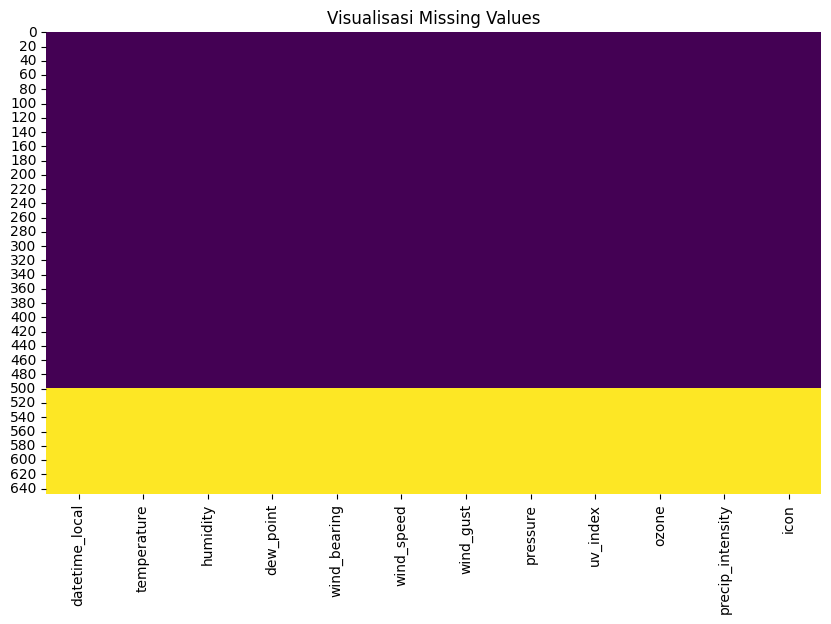

In [ ]:
# Membuat plot visualisasi missing value
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

In [ ]:
# Menghapus baris kosong
df.dropna(inplace=True)
df

,datetime_local,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon
0,01-10-2019 00:00,26.0,1.0,22.01,101.0,3.08,6.42,1008.45,0.0,268.6,0.0,partly-cloudy-night
1,01-10-2019 01:00,25.0,1.0,22.06,105.0,2.94,6.28,1008.24,0.0,269.1,0.0,partly-cloudy-night
2,01-10-2019 02:00,25.0,1.0,22.06,106.0,2.82,6.08,1007.90,0.0,269.7,0.0,partly-cloudy-night
3,01-10-2019 03:00,24.0,1.0,21.87,106.0,2.63,5.74,1007.61,0.0,270.4,0.0,partly-cloudy-night
4,01-10-2019 04:00,23.0,1.0,21.53,100.0,2.39,5.30,1007.51,0.0,271.3,0.0,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...
494,21-10-2019 14:00,32.0,0.0,6.13,319.0,3.77,4.50,1011.58,5.0,274.5,0.0,clear-day
495,21-10-2019 15:00,32.0,0.0,5.74,321.0,4.08,5.20,1010.65,3.0,274.7,0.0,clear-day
496,21-10-2019 16:00,32.0,0.0,6.05,323.0,3.94,5.68,1010.31,1.0,274.9,0.0,clear-day
497,21-10-2019 17:00,31.0,0.0,6.85,326.0,3.61,6.08,1010.73,0.0,275.7,0.0,clear-day


In [ ]:
missing_percentage = 0.3

categorical_columns = ["temperature", "dew_point", "wind_speed"]

for col in categorical_columns:
    df.loc[df.sample(frac=missing_percentage).index, col] = np.nan # Mengubah 30% dari nilai kolom dengan Nan

df_missing = df.copy() # Menyalin dataframe
df_missing

,datetime_local,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon
0,01-10-2019 00:00,NaN,1.0,22.01,101.0,NaN,6.42,1008.45,0.0,268.6,0.0,partly-cloudy-night
1,01-10-2019 01:00,NaN,1.0,NaN,105.0,NaN,6.28,1008.24,0.0,269.1,0.0,partly-cloudy-night
2,01-10-2019 02:00,25.0,1.0,22.06,106.0,NaN,6.08,1007.90,0.0,269.7,0.0,partly-cloudy-night
3,01-10-2019 03:00,24.0,1.0,21.87,106.0,2.63,5.74,1007.61,0.0,270.4,0.0,partly-cloudy-night
4,01-10-2019 04:00,23.0,1.0,21.53,100.0,NaN,5.30,1007.51,0.0,271.3,0.0,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...
494,21-10-2019 14:00,32.0,0.0,NaN,319.0,NaN,4.50,1011.58,5.0,274.5,0.0,clear-day
495,21-10-2019 15:00,NaN,0.0,NaN,321.0,4.08,5.20,1010.65,3.0,274.7,0.0,clear-day
496,21-10-2019 16:00,NaN,0.0,NaN,323.0,NaN,5.68,1010.31,1.0,274.9,0.0,clear-day
497,21-10-2019 17:00,31.0,0.0,6.85,326.0,3.61,6.08,1010.73,0.0,275.7,0.0,clear-day


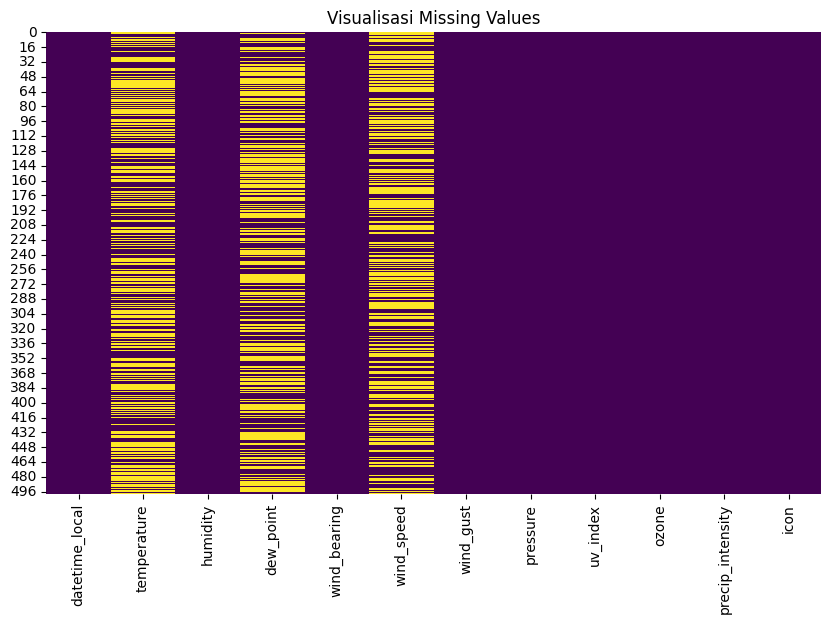

In [ ]:
# Membuat plot visualisasi missing value
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

# Forward Fill: Mengisi nilai yang hilang dengan nilai sebelumnya

In [ ]:
df_try1 = df_missing.copy()
df_try1

,datetime_local,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon
0,01-10-2019 00:00,NaN,1.0,22.01,101.0,NaN,6.42,1008.45,0.0,268.6,0.0,partly-cloudy-night
1,01-10-2019 01:00,NaN,1.0,NaN,105.0,NaN,6.28,1008.24,0.0,269.1,0.0,partly-cloudy-night
2,01-10-2019 02:00,25.0,1.0,22.06,106.0,NaN,6.08,1007.90,0.0,269.7,0.0,partly-cloudy-night
3,01-10-2019 03:00,24.0,1.0,21.87,106.0,2.63,5.74,1007.61,0.0,270.4,0.0,partly-cloudy-night
4,01-10-2019 04:00,23.0,1.0,21.53,100.0,NaN,5.30,1007.51,0.0,271.3,0.0,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...
494,21-10-2019 14:00,32.0,0.0,NaN,319.0,NaN,4.50,1011.58,5.0,274.5,0.0,clear-day
495,21-10-2019 15:00,NaN,0.0,NaN,321.0,4.08,5.20,1010.65,3.0,274.7,0.0,clear-day
496,21-10-2019 16:00,NaN,0.0,NaN,323.0,NaN,5.68,1010.31,1.0,274.9,0.0,clear-day
497,21-10-2019 17:00,31.0,0.0,6.85,326.0,3.61,6.08,1010.73,0.0,275.7,0.0,clear-day


In [ ]:
# Forward Fill
df_try1.fillna(method='ffill', inplace=True)
df_try1

<ipython-input-45-a678f2f5c5f2>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_try1.fillna(method='ffill', inplace=True)


,datetime_local,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon
0,01-10-2019 00:00,NaN,1.0,22.01,101.0,NaN,6.42,1008.45,0.0,268.6,0.0,partly-cloudy-night
1,01-10-2019 01:00,NaN,1.0,22.01,105.0,NaN,6.28,1008.24,0.0,269.1,0.0,partly-cloudy-night
2,01-10-2019 02:00,25.0,1.0,22.06,106.0,NaN,6.08,1007.90,0.0,269.7,0.0,partly-cloudy-night
3,01-10-2019 03:00,24.0,1.0,21.87,106.0,2.63,5.74,1007.61,0.0,270.4,0.0,partly-cloudy-night
4,01-10-2019 04:00,23.0,1.0,21.53,100.0,2.63,5.30,1007.51,0.0,271.3,0.0,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...
494,21-10-2019 14:00,32.0,0.0,10.54,319.0,2.19,4.50,1011.58,5.0,274.5,0.0,clear-day
495,21-10-2019 15:00,32.0,0.0,10.54,321.0,4.08,5.20,1010.65,3.0,274.7,0.0,clear-day
496,21-10-2019 16:00,32.0,0.0,10.54,323.0,4.08,5.68,1010.31,1.0,274.9,0.0,clear-day
497,21-10-2019 17:00,31.0,0.0,6.85,326.0,3.61,6.08,1010.73,0.0,275.7,0.0,clear-day


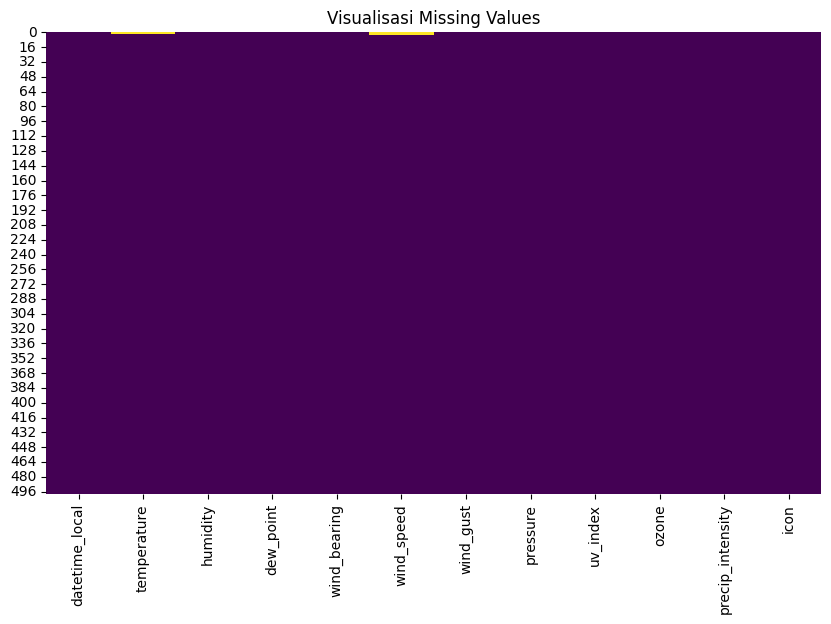

In [ ]:
# Membuat plot visualisasi missing value
plt.figure(figsize=(10, 6))
sns.heatmap(df_try1.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

# Backward Fill: Mengisi nilai yang hilang dengan nilai setelahnya

In [ ]:
df_try2 = df_missing.copy()
df_try2

,datetime_local,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon
0,01-10-2019 00:00,NaN,1.0,22.01,101.0,NaN,6.42,1008.45,0.0,268.6,0.0,partly-cloudy-night
1,01-10-2019 01:00,NaN,1.0,NaN,105.0,NaN,6.28,1008.24,0.0,269.1,0.0,partly-cloudy-night
2,01-10-2019 02:00,25.0,1.0,22.06,106.0,NaN,6.08,1007.90,0.0,269.7,0.0,partly-cloudy-night
3,01-10-2019 03:00,24.0,1.0,21.87,106.0,2.63,5.74,1007.61,0.0,270.4,0.0,partly-cloudy-night
4,01-10-2019 04:00,23.0,1.0,21.53,100.0,NaN,5.30,1007.51,0.0,271.3,0.0,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...
494,21-10-2019 14:00,32.0,0.0,NaN,319.0,NaN,4.50,1011.58,5.0,274.5,0.0,clear-day
495,21-10-2019 15:00,NaN,0.0,NaN,321.0,4.08,5.20,1010.65,3.0,274.7,0.0,clear-day
496,21-10-2019 16:00,NaN,0.0,NaN,323.0,NaN,5.68,1010.31,1.0,274.9,0.0,clear-day
497,21-10-2019 17:00,31.0,0.0,6.85,326.0,3.61,6.08,1010.73,0.0,275.7,0.0,clear-day


In [ ]:
# Backward Fill
df_try2.fillna(method='bfill', inplace=True)
df_try2

<ipython-input-48-92574255999f>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_try2.fillna(method='bfill', inplace=True)


,datetime_local,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon
0,01-10-2019 00:00,25.0,1.0,22.01,101.0,2.63,6.42,1008.45,0.0,268.6,0.0,partly-cloudy-night
1,01-10-2019 01:00,25.0,1.0,22.06,105.0,2.63,6.28,1008.24,0.0,269.1,0.0,partly-cloudy-night
2,01-10-2019 02:00,25.0,1.0,22.06,106.0,2.63,6.08,1007.90,0.0,269.7,0.0,partly-cloudy-night
3,01-10-2019 03:00,24.0,1.0,21.87,106.0,2.63,5.74,1007.61,0.0,270.4,0.0,partly-cloudy-night
4,01-10-2019 04:00,23.0,1.0,21.53,100.0,2.09,5.30,1007.51,0.0,271.3,0.0,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...
494,21-10-2019 14:00,32.0,0.0,6.85,319.0,4.08,4.50,1011.58,5.0,274.5,0.0,clear-day
495,21-10-2019 15:00,31.0,0.0,6.85,321.0,4.08,5.20,1010.65,3.0,274.7,0.0,clear-day
496,21-10-2019 16:00,31.0,0.0,6.85,323.0,3.61,5.68,1010.31,1.0,274.9,0.0,clear-day
497,21-10-2019 17:00,31.0,0.0,6.85,326.0,3.61,6.08,1010.73,0.0,275.7,0.0,clear-day


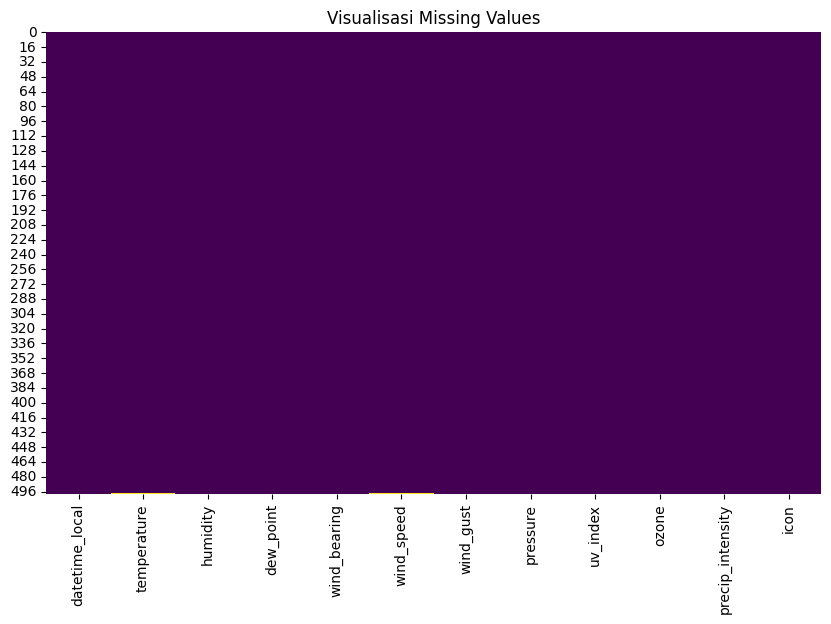

In [ ]:
# Membuat plot visualisasi missing value
plt.figure(figsize=(10, 6))
sns.heatmap(df_try2.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

# Moving Average Imputation: Mengisi missing values dengan rata-rata nilai sebelum dan sesudahnya

In [ ]:
df_try3 = df_missing.copy()
df_try3

,datetime_local,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon
0,01-10-2019 00:00,NaN,1.0,22.01,101.0,NaN,6.42,1008.45,0.0,268.6,0.0,partly-cloudy-night
1,01-10-2019 01:00,NaN,1.0,NaN,105.0,NaN,6.28,1008.24,0.0,269.1,0.0,partly-cloudy-night
2,01-10-2019 02:00,25.0,1.0,22.06,106.0,NaN,6.08,1007.90,0.0,269.7,0.0,partly-cloudy-night
3,01-10-2019 03:00,24.0,1.0,21.87,106.0,2.63,5.74,1007.61,0.0,270.4,0.0,partly-cloudy-night
4,01-10-2019 04:00,23.0,1.0,21.53,100.0,NaN,5.30,1007.51,0.0,271.3,0.0,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...
494,21-10-2019 14:00,32.0,0.0,NaN,319.0,NaN,4.50,1011.58,5.0,274.5,0.0,clear-day
495,21-10-2019 15:00,NaN,0.0,NaN,321.0,4.08,5.20,1010.65,3.0,274.7,0.0,clear-day
496,21-10-2019 16:00,NaN,0.0,NaN,323.0,NaN,5.68,1010.31,1.0,274.9,0.0,clear-day
497,21-10-2019 17:00,31.0,0.0,6.85,326.0,3.61,6.08,1010.73,0.0,275.7,0.0,clear-day


In [ ]:
# Moving Average Imputation
for col in ['temperature', 'dew_point', 'wind_speed']:
  df_try3[col] = df_try3[col].fillna(df_try3[col].rolling(window=24, min_periods=1, center=True).mean())

df_try3

,datetime_local,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon
0,01-10-2019 00:00,25.000000,1.0,22.010000,101.0,2.477500,6.42,1008.45,0.0,268.6,0.0,partly-cloudy-night
1,01-10-2019 01:00,26.000000,1.0,21.777500,105.0,2.362000,6.28,1008.24,0.0,269.1,0.0,partly-cloudy-night
2,01-10-2019 02:00,25.000000,1.0,22.060000,106.0,2.306667,6.08,1007.90,0.0,269.7,0.0,partly-cloudy-night
3,01-10-2019 03:00,24.000000,1.0,21.870000,106.0,2.630000,5.74,1007.61,0.0,270.4,0.0,partly-cloudy-night
4,01-10-2019 04:00,23.000000,1.0,21.530000,100.0,2.372857,5.30,1007.51,0.0,271.3,0.0,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...
494,21-10-2019 14:00,32.000000,0.0,10.036667,319.0,2.001250,4.50,1011.58,5.0,274.5,0.0,clear-day
495,21-10-2019 15:00,26.666667,0.0,9.670000,321.0,4.080000,5.20,1010.65,3.0,274.7,0.0,clear-day
496,21-10-2019 16:00,26.666667,0.0,9.670000,323.0,2.001250,5.68,1010.31,1.0,274.9,0.0,clear-day
497,21-10-2019 17:00,31.000000,0.0,6.850000,326.0,3.610000,6.08,1010.73,0.0,275.7,0.0,clear-day


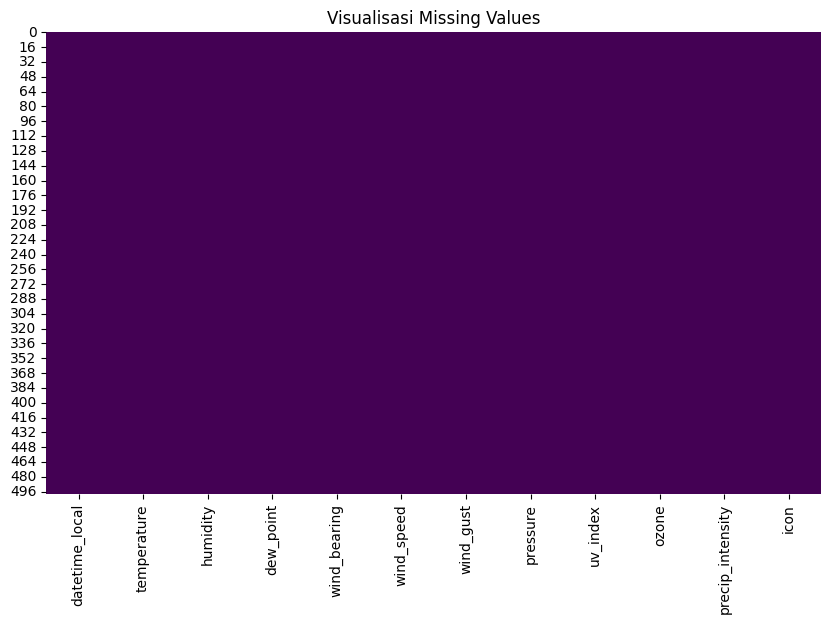

In [ ]:
# Membuat plot visualisasi missing value
plt.figure(figsize=(10, 6))
sns.heatmap(df_try3.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

# Seasonal Adjustment: Jika data memiliki pola musiman, metode penyesuaian musiman dapat digunakan

In [ ]:
df_try4 = df_missing.copy()
df_try4

,datetime_local,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon
0,01-10-2019 00:00,26.0,1.0,22.01,101.0,3.08,6.42,1008.45,0.0,268.6,0.0,partly-cloudy-night
1,01-10-2019 01:00,NaN,1.0,22.06,105.0,NaN,6.28,1008.24,0.0,269.1,0.0,partly-cloudy-night
2,01-10-2019 02:00,25.0,1.0,22.06,106.0,2.82,6.08,1007.90,0.0,269.7,0.0,partly-cloudy-night
3,01-10-2019 03:00,NaN,1.0,21.87,106.0,NaN,5.74,1007.61,0.0,270.4,0.0,partly-cloudy-night
4,01-10-2019 04:00,23.0,1.0,NaN,100.0,2.39,5.30,1007.51,0.0,271.3,0.0,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...
494,21-10-2019 14:00,32.0,0.0,6.13,319.0,3.77,4.50,1011.58,5.0,274.5,0.0,clear-day
495,21-10-2019 15:00,32.0,0.0,5.74,321.0,4.08,5.20,1010.65,3.0,274.7,0.0,clear-day
496,21-10-2019 16:00,NaN,0.0,NaN,323.0,NaN,5.68,1010.31,1.0,274.9,0.0,clear-day
497,21-10-2019 17:00,31.0,0.0,6.85,326.0,3.61,6.08,1010.73,0.0,275.7,0.0,clear-day


In [ ]:
# Buat kolom 'hour' untuk mengambil rata-rata musiman
df_try4['datetime_local'] = pd.to_datetime(df_try4['datetime_local'], format='%d-%m-%Y %H:%M') # Spesifik format datetime untuk pandas
df_try4['hour'] = df_try4['datetime_local'].dt.hour

# Imputasi Seasonal Adjustment: Isi NaN dengan rata-rata nilai dari jam yang sama di hari lain
for col in ['temperature', 'dew_point', 'wind_speed']:
  df_try4[col] = df_try4.groupby('hour')[col].transform(lambda x: x.fillna(x.mean()))

df_try4

,datetime_local,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon,hour
0,2019-10-01 00:00:00,26.000000,1.0,22.010000,101.0,3.080000,6.42,1008.45,0.0,268.6,0.0,partly-cloudy-night,0
1,2019-10-01 01:00:00,28.066667,1.0,22.060000,105.0,2.760000,6.28,1008.24,0.0,269.1,0.0,partly-cloudy-night,1
2,2019-10-01 02:00:00,25.000000,1.0,22.060000,106.0,2.820000,6.08,1007.90,0.0,269.7,0.0,partly-cloudy-night,2
3,2019-10-01 03:00:00,28.066667,1.0,21.870000,106.0,2.760000,5.74,1007.61,0.0,270.4,0.0,partly-cloudy-night,3
4,2019-10-01 04:00:00,23.000000,1.0,21.257895,100.0,2.390000,5.30,1007.51,0.0,271.3,0.0,partly-cloudy-night,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2019-10-21 14:00:00,32.000000,0.0,6.130000,319.0,3.770000,4.50,1011.58,5.0,274.5,0.0,clear-day,14
495,2019-10-21 15:00:00,32.000000,0.0,5.740000,321.0,4.080000,5.20,1010.65,3.0,274.7,0.0,clear-day,15
496,2019-10-21 16:00:00,24.800000,0.0,10.234375,323.0,2.030769,5.68,1010.31,1.0,274.9,0.0,clear-day,16
497,2019-10-21 17:00:00,31.000000,0.0,6.850000,326.0,3.610000,6.08,1010.73,0.0,275.7,0.0,clear-day,17


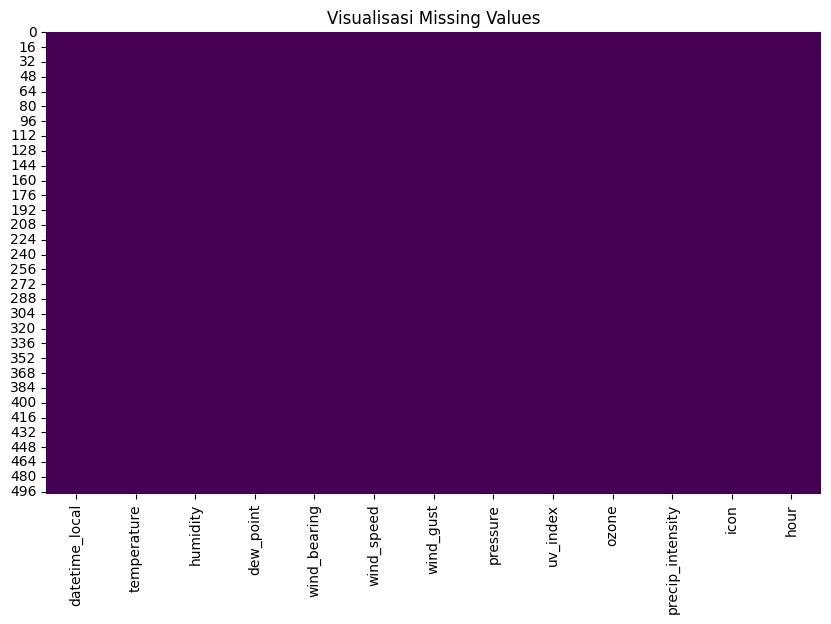

In [ ]:
# Membuat plot visualisasi missing value
plt.figure(figsize=(10, 6))
sns.heatmap(df_try4.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()